### MSIS 2802 - Data Science with Python

__Midterm Take-Home Exam__ | Submitted by: Rohit Jacob 

In [557]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [545]:
df = pd.read_csv('/Users/Rohit/Desktop/midterm.tsv', delimiter='\t', engine='python')

In [438]:
df.index = df.iloc[:,0]
del df[df.columns[0]]

In [439]:
df.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
"indic_et,sitc06,partner,geo\time",,,,,,,,,,,,,,,,,
"CONT_EXP_EU,SITC0_1,EU27,AT",2.4,2.5,2.4,2.5,2.5,2.5,2.6,2.6,2.6,2.6,2.5,2.4,2.4,2.1,2.1,2.0,1.9
"CONT_EXP_EU,SITC0_1,EU27,BE",9.1,9.0,9.0,9.2,9.1,9.1,9.6,9.4,9.5,9.6,9.9,10.1,10.2,10.4,10.5,10.4,10.6
"CONT_EXP_EU,SITC0_1,EU27,BG",0.6,0.6,0.6,0.6,0.6,0.6,0.5,0.4,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.2
"CONT_EXP_EU,SITC0_1,EU27,CY",0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
"CONT_EXP_EU,SITC0_1,EU27,CZ",1.9,1.7,1.6,1.6,1.5,1.4,1.4,1.4,1.3,1.1,1.1,0.9,0.7,0.7,0.6,0.6,0.5


In [440]:
df = df.fillna(0)
df.shape

(9328, 17)

In [441]:
mean = df.replace(': ', 0).replace('',0).replace('0 n', float(0)).apply(lambda x: pd.to_numeric(x)).mean(axis=1).to_frame()

In [442]:
mean['Mean'] = mean[0]
del mean[0]

In [443]:
mean.head()

,Mean
"indic_et,sitc06,partner,geo\time",
"CONT_EXP_EU,SITC0_1,EU27,AT",2.388235
"CONT_EXP_EU,SITC0_1,EU27,BE",9.688235
"CONT_EXP_EU,SITC0_1,EU27,BG",0.370588
"CONT_EXP_EU,SITC0_1,EU27,CY",0.094118
"CONT_EXP_EU,SITC0_1,EU27,CZ",1.176471


In [444]:
mean[0] = mean.index
mean.head()

,Mean,0
"indic_et,sitc06,partner,geo\time",,
"CONT_EXP_EU,SITC0_1,EU27,AT",2.388235,"CONT_EXP_EU,SITC0_1,EU27,AT"
"CONT_EXP_EU,SITC0_1,EU27,BE",9.688235,"CONT_EXP_EU,SITC0_1,EU27,BE"
"CONT_EXP_EU,SITC0_1,EU27,BG",0.370588,"CONT_EXP_EU,SITC0_1,EU27,BG"
"CONT_EXP_EU,SITC0_1,EU27,CY",0.094118,"CONT_EXP_EU,SITC0_1,EU27,CY"
"CONT_EXP_EU,SITC0_1,EU27,CZ",1.176471,"CONT_EXP_EU,SITC0_1,EU27,CZ"


In [445]:
d = mean[0].apply(lambda x: pd.Series(x.split(',')))

In [462]:
mean = mean[["Mean"]]
mean= mean.join(d)
m = mean.reset_index()

In [463]:
m.head()
m = m[[0,1,2,3,'Mean']]

In [464]:
m.head()

,0,1,2,3,Mean
0,CONT_EXP_EU,SITC0_1,EU27,AT,2.388235
1,CONT_EXP_EU,SITC0_1,EU27,BE,9.688235
2,CONT_EXP_EU,SITC0_1,EU27,BG,0.370588
3,CONT_EXP_EU,SITC0_1,EU27,CY,0.094118
4,CONT_EXP_EU,SITC0_1,EU27,CZ,1.176471


In [465]:
n = m[(m[0]=='CONT_EXP_EU') & (m[2]=='EU27') & (m[1]=='TOTAL') & (m[3]!=m[2])]

In [466]:
ansone = n[[3, 'Mean']]
ansone.index = ansone[3]

## Question 1: Which EU country has the highest average intra-EU trade from 1999-2015 and what is this annual average?

Answer 1: Germany (DE) has the highest average intra-EU trade at (22.34)

In [546]:
ansone = ansone.sort_values(by='Mean', ascending=False)
ansone.head(5)

,3,Mean
3,,
DE,DE,22.341176
NL,NL,12.147059
FR,FR,10.576471
BE,BE,8.888235
IT,IT,8.100000


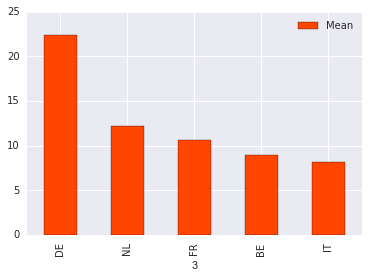

In [558]:
ansone.head(5).plot(kind='bar', color='orangered')

In [517]:
d = pd.read_csv('/Users/Rohit/Desktop/midterm.tsv', delimiter=',|\t', engine='python')
o = d[(d['indic_et']=='MIO_EXP_VAL') & (d['partner']=='EU27') & (d['sitc06']=='TOTAL') & (d['partner']!=d['geo\\time'])]

In [518]:
anstwo = o.iloc[:,4:]
anstwo.index = o['geo\\time']

## Question 2: Which year has the highest amount of intra-EU trade between 1999-2015 and what is the total amount?

Answer 2: 2015 has the highest amount (3,048,787)

In [549]:
anstwo = anstwo.apply(lambda x: pd.to_numeric(x))
anstwo.sum().to_frame().sort_values(by=0, ascending=False).head()

,0
2015,3048787
2014,2913472
2013,2822159
2012,2819925
2011,2805127


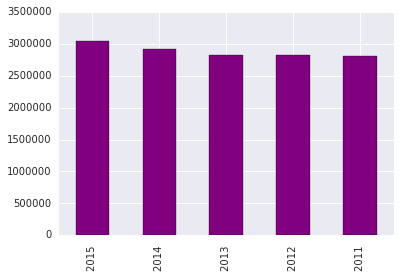

In [563]:
anstwo.sum().to_frame().sort_values(by=0, ascending=False).head().plot(kind='bar', color='purple', legend=False)

In [523]:
ansthree = o.iloc[:,4:].
ansthree.index = o['geo\\time']

In [537]:
ansthree = ansthree[[ansthree.columns[0], ansthree.columns[-1]]].apply(lambda x: pd.to_numeric(x))

In [538]:
ansthree.columns = ['2015', '1999']

In [539]:
ansthree['PercentageChange'] = (ansthree['2015'] - ansthree['1999'])/ansthree['1999']

## Question 3: Which EU country has the largest increase from 1999-2015 in terms of intra-EU trade?  Macro-economically, what is your hypothesis behind this increase?

Answer 3: Lithuania (LT) has the largest increase because being a argricultural country, it has considerably increased its export of cereals to help push up the overeall trade.

In [541]:
ansthree.sort_values(by='PercentageChange', ascending=False).head(5)

,2015,1999,PercentageChange
geo\time,,,
LT,14067,1906,6.380378
BG,14780,2135,5.922717
RO,40077,5826,5.878991
SK,57763,8570,5.740140
PL,141018,20959,5.728279


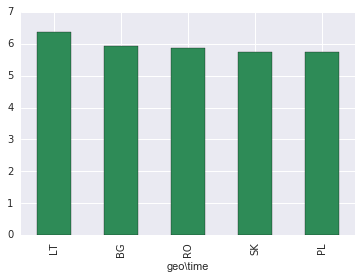

In [560]:
ansthree.sort_values(by='PercentageChange', ascending=False).head(5)['PercentageChange'].plot(kind='bar', color='seagreen')

## Question 4: Which EU country has the largest decrease from 1999-2015 in terms of intra-EU trade?  Macro-economically, what is your hypothesis behind this drop?

Answer 4: There is no decrease in any of the countries but Malta (MT) has the smallest increase because Malta is apparently the hardest place to have a business with all its restrictions on trade licenses.

In [543]:
ansfour = ansthree.sort_values(by='PercentageChange', ascending=True).head(5)
ansfour

,2015,1999,PercentageChange
geo\time,,,
MT,1049,911,0.151482
UK,184082,155137,0.186577
FI,31733,25932,0.223700
IE,58811,44959,0.308103
FR,267838,199461,0.342809


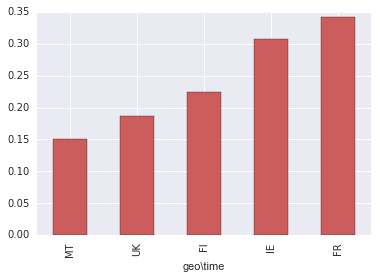

In [562]:
ansfour['PercentageChange'].plot(kind='bar', color='indianred')

## Question 5: Analyze this dataset as a DataFrame and describe an insight that you are able to deduce.

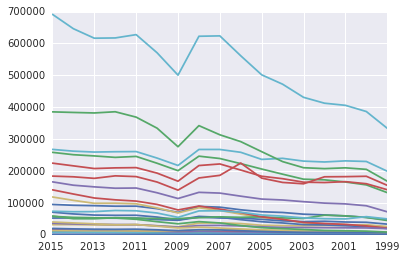

In [580]:
ansfive = o.iloc[:,4:]
ansfive.T.apply(lambda x: pd.to_numeric(x)).plot(legend=False)

It's pretty interesting looking at the graph above itself. Although it's just a high-level view of the trade values, we can clearly notice two things here:

* All trades have a steady increase for two factors:

    * Each country has improved their trade styles to cope up with the rest of the countries in the European Union and that has stopped us from answering question 4 because there are no real decrease in any of their trades.
    
    * The rise in value could also be attributed to inflation of the Euro over time. 
    
* Recession played a big part in trades during the 2008-2009 period where every trade amount dropped significantly but it played a bigger factor for the countries that were already doing well, and didn't make much of an impact for the countries who were still developing at the time.